In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce

In [21]:
training_data = pd.read_csv('../Datasets/full_scaled_data.csv')

In [22]:
training_data.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,proto,service,ACC,CLO,CON,FIN,INT,REQ,RST,label
0,-0.213727,-0.124455,-0.151816,-0.043684,-0.087369,0.057181,0.71944,-0.820395,0.643913,-0.263498,...,-0.34761,-0.719547,0,0,0,0,1,0,0,0
1,-0.213728,-0.124455,-0.151816,-0.036308,-0.087369,0.286565,0.71944,-0.820395,4.539351,-0.263498,...,-0.34761,-0.719547,0,0,0,0,1,0,0,0
2,-0.213729,-0.124455,-0.151816,-0.040351,-0.087369,0.791209,0.71944,-0.820395,4.391459,-0.263498,...,-0.34761,-0.719547,0,0,0,0,1,0,0,0
3,-0.213729,-0.124455,-0.151816,-0.041330,-0.087369,0.566923,0.71944,-0.820395,2.977031,-0.263498,...,-0.34761,-0.719547,0,0,0,0,1,0,0,0
4,-0.213728,-0.124455,-0.151816,-0.034187,-0.087369,0.118350,0.71944,-0.820395,4.369219,-0.263498,...,-0.34761,-0.719547,0,0,0,0,1,0,0,0


In [57]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                82332 non-null  float64
 1   spkts              82332 non-null  float64
 2   dpkts              82332 non-null  float64
 3   sbytes             82332 non-null  float64
 4   dbytes             82332 non-null  float64
 5   rate               82332 non-null  float64
 6   sttl               82332 non-null  float64
 7   dttl               82332 non-null  float64
 8   sload              82332 non-null  float64
 9   dload              82332 non-null  float64
 10  sloss              82332 non-null  float64
 11  dloss              82332 non-null  float64
 12  sinpkt             82332 non-null  float64
 13  dinpkt             82332 non-null  float64
 14  sjit               82332 non-null  float64
 15  djit               82332 non-null  float64
 16  swin               823

In [23]:
X = training_data.drop(columns=['label'])
y = training_data['label']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [25]:
classify_type = "binary"

## Random Forest

In [26]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [27]:
print("Accuracy:    ", accuracy_score(y_test, y_test_pred))
print("Precision:   ", precision_score(y_test, y_test_pred))
print("Recall:      ", recall_score(y_test, y_test_pred))
print("F1-score:    ", f1_score(y_test, y_test_pred))

Accuracy:     0.9770198707671379
Precision:    0.982922707462421
Recall:       0.9752029650547123
F1-score:     0.979047619047619


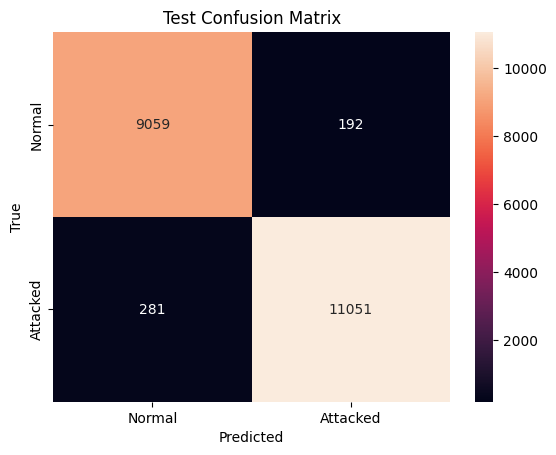

In [28]:
display_labels = {"binary":["Normal","Attacked"],"multiclass":["Normal","Generic","Exploits","Fuzzers","DoS","Reconnaissance","Analysis", "Backdoor", "Shellcode", "Worms"]}
matrix_test = sns.heatmap(confusion_matrix(y_test, y_test_pred),annot=True, fmt='d',xticklabels=display_labels[classify_type], yticklabels=display_labels[classify_type])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Test Confusion Matrix")
plt.savefig('../images/rf_test_confusion_matrix_' + classify_type + ".png", bbox_inches='tight')
plt.show()

## Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2, min_samples_split=2)
dt.fit(X_train, y_train)
y_dt_train_pred = dt.predict(X_train)
y_dt_test_pred = dt.predict(X_test)

In [83]:
print("Accuracy:    ", accuracy_score(y_test, y_dt_test_pred))
print("Precision:   ", precision_score(y_test, y_dt_test_pred))
print("Recall:      ", recall_score(y_test, y_dt_test_pred))
print("F1-score:    ", f1_score(y_test, y_dt_test_pred))

Accuracy:     0.9695379682262061
Precision:    0.9779444593267256
Recall:       0.9664666431344864
F1-score:     0.9721716745816874


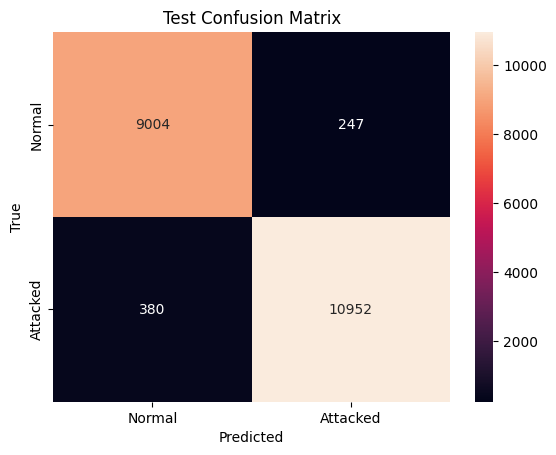

In [84]:
display_labels = {"binary":["Normal","Attacked"],"multiclass":["Normal","Generic","Exploits","Fuzzers","DoS","Reconnaissance","Analysis", "Backdoor", "Shellcode", "Worms"]}
matrix_test = sns.heatmap(confusion_matrix(y_test, y_dt_test_pred),annot=True, fmt='d',xticklabels=display_labels[classify_type], yticklabels=display_labels[classify_type])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Test Confusion Matrix")
plt.savefig('../images/dt_test_confusion_matrix_' + classify_type + ".png", bbox_inches='tight')
plt.show()